Diagonalization of a matrix is a ubiquitous problem in linear algebra applications. For example in decomposing a 2 qubit unitary to its quantum circuit reprentation requires diagonalization. 

$$ 
U = V D V^\dagger
$$

where $D$ is a diagonal matrix, containing the eigenvalues of $U$, $V$ is the matrix that contains the left eigenvectors of $A$ as column vectors. Unitary matrices are normal matrices, hence they are always diagonalizable. 

In python and the numpy package, the `np.linalg.eig` and `np.linalg.eigh` methods are to calculate $D$ and $V$. 



In [17]:
import numpy as np
import cirq 
import matplotlib.pyplot as plt 

In [18]:
np.set_printoptions(suppress=True, precision=2)
U = cirq.testing.random_unitary(8)
U

array([[-0.19+0.24j,  0.33-0.19j, -0.3 -0.19j, -0.06-0.31j,  0.19+0.38j,
        -0.02+0.12j, -0.44+0.14j,  0.05-0.35j],
       [-0.05+0.25j,  0.31-0.17j, -0.18-0.51j,  0.31+0.26j,  0.17-0.31j,
         0.05-0.18j,  0.4 -0.09j, -0.05-0.13j],
       [ 0.31-0.44j,  0.09-0.19j, -0.11-0.08j,  0.21+0.09j,  0.21+0.58j,
        -0.25-0.18j,  0.2 +0.14j, -0.03+0.23j],
       [ 0.25-0.43j,  0.14-0.11j,  0.11-0.05j, -0.16-0.42j, -0.03-0.23j,
         0.3 -0.36j,  0.1 +0.07j,  0.27-0.38j],
       [ 0.17+0.18j,  0.16+0.35j,  0.  +0.39j, -0.  +0.19j,  0.38-0.j  ,
        -0.25-0.47j, -0.17-0.3j ,  0.06-0.23j],
       [-0.13-0.07j,  0.55-0.36j, -0.  +0.48j, -0.16+0.27j, -0.16+0.09j,
         0.21+0.2j ,  0.18-0.25j,  0.11+0.04j],
       [ 0.16+0.01j,  0.05-0.21j, -0.07-0.32j, -0.51+0.14j,  0.12-0.19j,
        -0.08-0.11j, -0.33-0.18j,  0.3 +0.5j ],
       [ 0.41-0.15j, -0.16+0.09j, -0.  -0.24j, -0.19+0.21j,  0.13+0.12j,
         0.12+0.48j,  0.01-0.43j, -0.15-0.39j]])

In [19]:
d, V= np.linalg.eig(U)
d, V

(array([ 0.05+1.j  , -0.73+0.68j,  0.87+0.5j ,  0.99-0.17j, -0.98-0.18j,
         0.47-0.88j, -0.04-1.j  , -0.67-0.74j]),
 array([[ 0.66+0.j  ,  0.06-0.34j,  0.05-0.07j,  0.16+0.01j, -0.39+0.12j,
          0.21-0.05j,  0.42-0.08j, -0.12-0.1j ],
        [ 0.12+0.29j, -0.22+0.16j, -0.04+0.28j,  0.57+0.j  ,  0.24+0.2j ,
         -0.25+0.41j,  0.04-0.17j, -0.25+0.01j],
        [-0.1 -0.37j,  0.19+0.41j, -0.19-0.29j, -0.07+0.02j, -0.11-0.17j,
         -0.16+0.33j,  0.44+0.08j, -0.38-0.03j],
        [-0.28-0.j  , -0.26+0.08j, -0.  -0.15j,  0.32-0.27j, -0.11-0.03j,
          0.08+0.03j,  0.46+0.j  ,  0.65+0.j  ],
        [ 0.27-0.08j,  0.16+0.25j, -0.41-0.39j,  0.36+0.3j ,  0.  -0.08j,
          0.13-0.02j, -0.42-0.11j,  0.28-0.05j],
        [-0.13-0.22j,  0.47+0.j  ,  0.62+0.j  ,  0.27+0.07j, -0.21+0.08j,
         -0.31+0.04j, -0.13-0.19j,  0.13-0.18j],
        [-0.04-0.23j, -0.37-0.26j, -0.02+0.2j , -0.09+0.14j, -0.28-0.48j,
          0.05+0.47j, -0.21-0.2j ,  0.06-0.25j],
        [-0.13-0.

In [20]:
np.testing.assert_allclose(V @ np.diag(d) @ V.conj().T, U)

Great, this seems to work for random unitaries. However, for certain unitaries this starts to crumble. 

### The main question: what classes of matrices result in incorrect `numpy.linalg.eig` decomposition? More specifically: what kind of numerical errors cause these errors and can we correct them? 

## An example $U_1U_2^\dagger$

In [51]:
u2=np.array(
[[ 6.3616870250576751e-01+7.7154998668403085e-01j,  7.4915966813003955e-18+4.2843403189465048e-17j, -1.0670468446714549e-16+1.1538031985852377e-16j,  7.2296961594819082e-19+5.4038459512872594e-18j],
 [ 8.4978997301802701e-17+1.1893895609896763e-16j,  2.2035859738533992e-01+1.1292208651931387e-01j,  6.6484970601421378e-01-7.0383935318155111e-01j, -2.2722217185744742e-02-2.7557668741074088e-02j],
 [ 1.6640839446779151e-17-3.2997465454912499e-17j, -2.2087747199836227e-01+4.4261359188593208e-01j, -1.1725777733627676e-01-1.0588094072445392e-01j,  6.1988112341373613e-01-5.8829718979630630e-01j],
 [ 1.0141542958775636e-17+6.1509405247093862e-17j, -5.6732929637545129e-02-8.3113080575242637e-01j,  1.8925770983029677e-01+4.2501678096757978e-02j,  1.4402176357197022e-01-4.9763020072181474e-01j]])
# unitary 
np.testing.assert_allclose(u2 @ u2.conj().T, np.eye(4),atol=1e-8,rtol=1e-5)

In [53]:
u1=np.array(
[[ 1.0000000000000000+0.0000000000000000e+00j,  0.0000000000000000+0.0000000000000000e+00j,  0.0000000000000000+0.0000000000000000e+00j,  0.0000000000000000+0.0000000000000000e+00j],
 [ 0.0000000000000000+0.0000000000000000e+00j,  0.2273102773349319-9.8180175613134565e-02j, -0.1200906687385194-9.6072534990815506e-01j, -0.0357172823753281+8.6736173798840355e-19j],
 [ 0.0000000000000000+0.0000000000000000e+00j,  0.2009831761518099+4.5199492504062982e-01j, -0.1562881664727747+2.3112095861637594e-02j, -0.0595517189636592-8.5252553243605544e-01j],
 [ 0.0000000000000000+0.0000000000000000e+00j, -0.6773506763478407-4.8496711520170011e-01j,  0.1531920008715559-1.1898354609028339e-01j, -0.2923244362763149-4.2769674888704595e-01j]]
)
# unitary 
np.testing.assert_allclose(u1 @ u1.conj().T, np.eye(4),atol=1e-8,rtol=1e-5)

In [69]:
u1u2 = u1 @ u2.conj().T
# unitary 
np.testing.assert_allclose(u1u2 @ u1u2.conj().T, np.eye(4),atol=1e-8,rtol=1e-5)
np.set_printoptions(precision=16)
u1u2

array([[ 0.6361687025057675-0.7715499866840309j,
         0.0000000000000001-0.0000000000000001j,
         0.                +0.j                ,
         0.                -0.0000000000000001j],
       [-0.0000000000000001+0.0000000000000001j,
         0.6361687025057675-0.7715499866840307j,
         0.                +0.j                ,
         0.0000000000000003-0.j                ],
       [ 0.                +0.j                ,
        -0.0000000000000001+0.0000000000000003j,
         0.6361687025057672-0.771549986684031j ,
        -0.0000000000000003-0.0000000000000001j],
       [-0.0000000000000001+0.j                ,
        -0.0000000000000001-0.0000000000000001j,
         0.0000000000000003+0.j                ,
         0.6361687025057673-0.7715499866840306j]])

In [55]:
np.abs(u1u2)

array([[1.                        , 0.00000000000000014617765 ,
        0.000000000000000036956059, 0.000000000000000062339857],
       [0.00000000000000014617765 , 0.9999999999999999        ,
        0.000000000000000013877788, 0.000000000000000320393611],
       [0.000000000000000036956059, 0.000000000000000327306971,
        0.9999999999999998        , 0.000000000000000297968741],
       [0.000000000000000062339857, 0.000000000000000172358549,
        0.00000000000000028449465 , 0.9999999999999997        ]])

In [25]:
cirq.testing.assert_allclose_up_to_global_phase(u1u2, np.eye(4), atol=1e-15)

In [61]:
d, V = np.linalg.eig(u1u2)
np.set_printoptions(precision=10)
print(d)
print(V)
np.testing.assert_allclose(V @ V.conj().T, np.eye(4), atol=1e-5)
np.testing.assert_allclose(V @ np.diag(d) @ V.conj().T, u1u2, atol=1e-5)

[0.6361687025-0.7715499867j 0.6361687025-0.7715499867j
 0.6361687025-0.7715499867j 0.6361687025-0.7715499867j]
[[ 1.          +0.j           -0.2690027164+0.3765036455j
  -0.17834095  +0.10973952j    0.0362832771-0.0323730974j]
 [ 0.          +0.j            0.7942486348+0.j
  -0.2250799327+0.0329068331j -0.0468730662+0.2252372828j]
 [ 0.          +0.j           -0.0933180212-0.1777973893j
   0.6877451266+0.j            0.7501951547+0.j          ]
 [ 0.          +0.j            0.3039658387+0.1494531827j
  -0.0077669823+0.6567756256j -0.1615394724-0.5965055047j]]


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=1e-05

Mismatch: 100%
Max absolute difference: 0.424860212
Max relative difference: 0.2644963524
 x: array([[ 1.26033 +0.j      , -0.178895+0.273551j, -0.137272-0.031776j,
         0.061411+0.297798j],
       [-0.178895-0.273551j,  0.735504+0.j      , -0.264079+0.332819j,...
 y: array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [27]:
# Does similarity keep this or only diagonals have this issue? 



**Definition**: Instability - $instab(U) = \vert\vert{U-VDV^\dagger}\vert\vert$

In [28]:
def instab(M): 
    '''instability of a matrix 
    Returns the Frobenius norm of the difference of the original matrix and the dot product of the 
    decomposed matrices. 
    '''
    d,V = np.linalg.eig(M)
    return np.linalg.norm(V @ np.diag(d) @ V.conj().T - M) / np.linalg.norm(M)

In [38]:
U = cirq.testing.random_unitary(4)
print("instability of random unitary: ", instab(U))
print("instability of u1u2: ", instab(u1u2))

print(u1u2)
print(U.conj().T @ u1u2 @ U)
print(U)

instability of random unitary:  6.368868976610029e-16
instability of u1u2:  0.5143889430443426
[[ 0.6361687025-0.7715499867j  0.          -0.j
   0.          +0.j            0.          -0.j          ]
 [-0.          +0.j            0.6361687025-0.7715499867j
   0.          +0.j            0.          -0.j          ]
 [ 0.          +0.j           -0.          +0.j
   0.6361687025-0.7715499867j -0.          -0.j          ]
 [-0.          +0.j           -0.          -0.j
   0.          +0.j            0.6361687025-0.7715499867j]]
[[ 0.6361687025-0.7715499867j -0.          -0.j
   0.          +0.j            0.          +0.j          ]
 [-0.          +0.j            0.6361687025-0.7715499867j
   0.          +0.j           -0.          +0.j          ]
 [-0.          -0.j            0.          +0.j
   0.6361687025-0.7715499867j  0.          +0.j          ]
 [-0.          -0.j           -0.          -0.j
  -0.          +0.j            0.6361687025-0.7715499867j]]
[[ 0.5452706253+0.049227243

**Diagonal sensitivity hypothesis**: The "more diagonal" the matrix is, the more sensitive it is noise. 
How diagonal is a matrix: Pearson coeff of rows and cols of the abs of the matrix? 
https://math.stackexchange.com/questions/1392491/measure-of-how-much-diagonal-a-matrix-is


In [16]:
Definition: Unitarity - 

SyntaxError: invalid syntax (<ipython-input-16-d05a1124bec3>, line 1)

In [17]:
def how_diag(U):
    A = np.abs(U)
    d = len(U)
    j = np.ones((d))
    r = np.array([i+1 for i in range(d)])
    r2 = r**2

    n=j @ A @ j.T
    sumx= r @ A @ j.T
    sumy= j @ A @ r.T
    sumx2 = r2 @ A @ j.T
    sumy2 = j @ A @ r2.T
    sumxy = r @ A @ r.T

    return (n*sumxy-sumx*sumy) / (np.sqrt(n*sumx2 - sumx**2)*np.sqrt(n*sumy2 - sumy**2))

print("diagonality of random matrix: ", how_diag(U))
print("diagonality of u1u2: ", how_diag(u1u2))

diagonality of random matrix:  0.005538920572517248
diagonality of u1u2:  0.9999999999999997


**Idea**: We can generate grades of "diagonality" via the eigenvalue "rotation" from a random unitaries eigenvalue decomposition.

In [18]:
from scipy.linalg import fractional_matrix_power as fpow

dim = 4
start = cirq.testing.random_unitary(4)
d,V = np.linalg.eig(start) 
np.testing.assert_array_almost_equal(V @ np.diag(d) @ V.conj().T, start)

res = 1000
xs=[]
ys=[]
cs=[]
Ms=[]
for i in range(res+1):
    rot = 0.99 + i/res/100
    M = fpow(V.conj().T, rot) @ start @ fpow(V,rot)
    c = deltaU(M)
    x = rot
    y = how_diag(M)
    xs.append(x)
    ys.append(y)
    cs.append(c)
    Ms.append(M)
    
plt.axes(xlabel="rotation",ylabel="diagonality")
plt.scatter(xs,ys,c=cs,cmap="magma",alpha=0.3,s=1)
plt.colorbar().set_label('Unitary distance')
print(M)
print(np.angle(M.diagonal()))
print(rot)
np.set_printoptions(precision=20)
print(V.conj().T @ start @ V)

NameError: name 'deltaU' is not defined

In [19]:
E = (np.random.rand(dim,dim) + 1.9j * np.random.rand(dim, dim))*1e-4
print(np.linalg.norm(E))
xs2=[]
ys2=[]
cs2=cs
for i in range(res+1):
    rot = i/res
    M = Ms[i]
    Me = M + E
    x = ys[i]
    y = instab(Me)
    xs2.append(x)
    ys2.append(y)
    
plt.axes(xlabel="diagonality",ylabel="instability")
plt.scatter(xs2,ys2,c=cs2,cmap="magma",alpha=0.3,s=1)
plt.colorbar().set_label('Unitary distance')


0.0004971306373738552


IndexError: list index out of range

Huh, I think we have to find the closest unitary matrix! Look at that: https://michaelgoerz.net/notes/finding-the-closest-unitary-for-a-given-matrix.html

In [20]:
def delta_uni(A):
    """ Assuming that A is a matrix obtained from projecting a unitary matrix
        to a smaller subspace, return the loss of population of subspace, as a
        distance measure of A from unitarity.

        Result is in [0,1], with 0 if A is unitary.
    """
    return 1.0 - np.real(np.trace((A.conj().T @ A))) / len(A)

In [21]:
deltaU(start)

NameError: name 'deltaU' is not defined

In [22]:
def closest_unitary(A):
    """ Calculate the unitary matrix U that is closest with respect to the
        operator norm distance to the general matrix A.

        Return U as a numpy matrix.
    """
    V, __, Wh = np.linalg.svd(A)
    U = np.array(V.dot(Wh))
    return U

def deltaU(A):
    """ Calculate the operator norm distance \Vert\hat{A} - \hat{U}\Vert between
        an arbitrary matrix $\hat{A}$ and the closest unitary matrix $\hat{U}$
    """
    __, S, __ = np.linalg.svd(A)
    d = 0.0
    for s in S:
        if abs(s - 1.0) > d:
            d = abs(s-1.0)
    return d


In [23]:
closest_unitary(U+E)

ValueError: operands could not be broadcast together with shapes (8,8) (4,4) 

In [24]:
deltaU(U+E)

ValueError: operands could not be broadcast together with shapes (8,8) (4,4) 

In [25]:
u1u2 = np.array([[ 8.51e-02+9.96e-01j,  2.46e-16-2.47e-16j , 1.45e-16+1.63e-17j ,-1.66e-16-3.09e-16j],
 [ 2.84e-16+2.01e-16j,  8.51e-02+9.96e-01j , 3.76e-16-2.04e-16j , 3.47e-16+2.05e-16j],
 [ 1.40e-16-4.06e-17j,  1.18e-16+1.34e-16j , 8.51e-02+9.96e-01j ,-1.08e-16+5.69e-17j],
 [-1.11e-16+3.33e-16j,  2.91e-16-2.15e-16j ,-1.23e-16-6.24e-18j , 8.51e-02+9.96e-01j]])

In [26]:
closest_unitary(u1u2)

array([[ 0.0851315893+0.9963697168j,  0.          -0.j          ,
         0.          +0.j          , -0.          -0.j          ],
       [ 0.          +0.j          ,  0.0851315893+0.9963697168j,
         0.          -0.j          ,  0.          +0.j          ],
       [ 0.          -0.j          ,  0.          +0.j          ,
         0.0851315893+0.9963697168j,  0.          +0.j          ],
       [-0.          +0.j          ,  0.          -0.j          ,
        -0.          -0.j          ,  0.0851315893+0.9963697168j]])

In [27]:
instab(u1u2)

NameError: name 'instab' is not defined

In [28]:
import pandas as pd 

rows_list=[]
for i in range(1000): 
    U = cirq.testing.random_unitary(4)
    rows_list.append({'delta':deltaU(U)})
    
df = pd.DataFrame(rows_list)
df.describe()

,delta
count,1.000000e+03
mean,3.216316e-16
std,1.417447e-16
min,0.000000e+00
25%,2.220446e-16
50%,2.220446e-16
75%,4.440892e-16
max,8.881784e-16


In [29]:
df.st()

AttributeError: 'DataFrame' object has no attribute 'st'

In [30]:
u1=np.array([[ 0.00+0.00j,  0.10+0.17j,  0.46+0.44j, -0.68+0.31j],
 [ 0.00+0.00j, -0.96-0.12j,  0.24-0.02j,  0.00+0.04j],
 [ 1.00+0.00j,  0.00+0.00j,  0.00+0.00j,  0.00+0.00j],
 [ 0.00+0.00j, -0.16+0.02j, -0.70+0.20j, -0.06+0.66j]])
u2=np.array([[ 1.40e-16+4.06e-17j,  1.75e-01-8.32e-02j,  4.81e-01-4.18e-01j,  2.49e-01+7.03e-01j],
 [ 1.93e-17-1.11e-16j, -2.03e-01+9.47e-01j, -3.51e-03-2.45e-01j,  4.37e-02+3.73e-03j],
 [ 8.51e-02-9.96e-01j,  4.77e-17-9.54e-17j,  1.48e-16+2.64e-17j, -1.24e-16-2.38e-17j],
 [-1.06e-16-6.81e-17j,  2.93e-03+1.56e-01j,  1.40e-01+7.17e-01j,  6.54e-01+1.17e-01j]])

In [31]:
deltaU(u1),deltaU(u2),deltaU(u1@u2.conj().T)

(0.007202387208699923, 0.00042145042814834, 0.007134158907906807)

In [32]:
instab(u1),instab(u2),instab(u1@u2.conj().T)

NameError: name 'instab' is not defined

In [33]:
instab(closest_unitary(u1)),instab(closest_unitary(u2)),instab(closest_unitary(u1)@closest_unitary(u2).conj().T)

NameError: name 'instab' is not defined

stdev			sensitivity
3.022740610204926e-08	0
5.428959526868299e-08	2.567459111990979e-16
3.859559954001677e-08	1.1101552599194047e-16
3.0687799061275006e-07	0
6.008244499341491e-07	6.246156745995376e-16
2.90592548494052e-07	5.936178749752486e-67
5.7164950478995835e-06	2.1434460122955144e-14
5.143166937187524e-06	2.842870253441674e-14
1.823403356883276e-06	1.2434457052305539e-14
7.294337636768795e-05	3.5413963266765674e-13
4.1206895706248665e-05	2.310929226363694e-13
4.627116665843485e-05	4.1307327588320215e-13
0.0002511294696289519	1.4413598267811159e-12
0.000657854913313023	4.902018992467909e-12
0.0002386710425375176	1.8564320181173924e-13
0.0071582226564918415	1.1938985260995512e-11
0.007036065394984188	4.83155706516007e-12
0.0031157756736796354	2.135506592611237e-11
0.053701651722640284	2.1158197493814273e-10
0.05172440367530774	1.1677774242822694e-10
0.02492459239989053	8.731861067558475e-11
0.6460765803943315	2.8025027968889057e-09
0.8144810224794619	5.067289231293031e-09
0.6074140

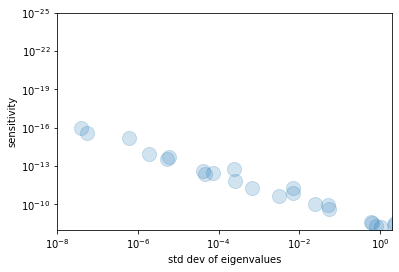

In [70]:
import random
import numpy as np
import matplotlib.pyplot as plt 

dim = 4

def binary_search(a,b,f,tol=1e-300):
    """
    binary_search finds the maximum point within the tolerance `tol` 
    in the interval `a` and `b` where f(a) is false
    """
    if f(a) == f(b):
        raise Exception("Incorrect input, f(a)==f(b): {}, a={}, b={}".format(f(a),a,b))
    while np.abs(a-b) > tol:
        mid = (a + b) / 2 
        if f(mid): 
            b = mid 
        else: 
            a = mid 
    return a
    
def sensitive(M, noise, max_err=1e-15, num_samples=100): 
    """
    A unitary is considered sensitive to a given level of `noise` if more than 90% of the `num_samples`
    noisy samples at that level fail to satisfy the unitarity assumption of diagonalization.
    All random samples are calculated by adding a random matrix E to the original unitary.
    E's elements are scaled to `noise`.
    """
    num_sensitive = 0 
    for s in range(num_samples): 
        E = (1 - np.random.rand(dim,dim) * 2 + 1.9j * np.random.rand(dim, dim)) * noise
        d, V = np.linalg.eig(M+E)
        if not np.allclose(V @ np.diag(d) @ V.conj().T, M+E, atol=max_err): 
            num_sensitive += 1
    return num_sensitive > 0.9 * num_samples
        
print("stdev\t\t\tsensitivity")
res = 8
num_samples = 3
xs = [] 
ys = [] 
for i in range(res, -1, -1): 
    for s in range(num_samples):
        # artificially create unitary diagonal with random eigenvalues chosen to be 
        # roughly have stdev of 10^{-i}  
        r = lambda: np.exp(1j * 2 * np.pi * random.gauss(1, 10**(-i)))
        r1 = r()
        DD = np.diag([r(),r(),r(),r()]) 
        sensitivity = binary_search(0,1,(lambda noise: sensitive(DD,noise,1e-8)))
        x = np.std(np.angle(np.diagonal(DD)))
        y = sensitivity 
        print("{}\t{}".format(x,y))
        xs.append(x)
        ys.append(y)

        
ax = plt.axes(xlabel="std dev of eigenvalues",ylabel="sensitivity")
ax.set_xlim([1e-8,2])
ax.set_ylim([1e-25,1e-8])
plt.yscale("log")
plt.xscale("log")
plt.gca().invert_yaxis()
plt.scatter(xs,ys,alpha=0.2, s=200)
plt.show()


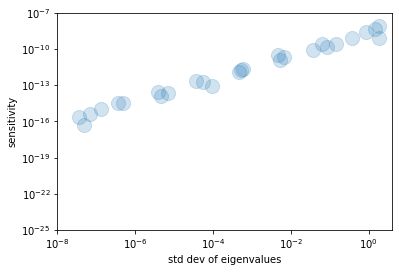

In [43]:
ax = plt.axes(xlabel="std dev of eigenvalues",ylabel="sensitivity")
ax.set_xlim([1e-8,4])
ax.set_ylim([1e-25,1e-7])
plt.yscale("log")
plt.xscale("log")
plt.scatter(xs,ys,alpha=0.2, s=200)


it seems that we have an issue with diagonals indeed - or the standard deviation of the eigenvalues? 
If they are all the same, I'm seeing super high noise sensitivity 

In [975]:
d,V = np.linalg.eig(u1u2)
np.allclose(V @ np.diag(d) @ V.conj().T, u1u2, atol=1e-15)

False

In [982]:
V = closest_unitary(V)
np.allclose(V @ np.diag(d) @ V.conj().T, u1u2, atol=1e-15)

True

In [983]:
V

array([[ 0.9635466175+0.j          , -0.1498708881+0.1927190488j,
        -0.0762438297+0.0762227948j,  0.0187636206+0.0009442297j],
       [ 0.1452197622+0.1519212486j,  0.9280520126-0.0207130505j,
        -0.1822144435-0.1631465943j,  0.0820605014+0.1660383864j],
       [ 0.0454611337+0.0679710794j,  0.0554637562+0.0099911703j,
         0.677684276 +0.0079295068j,  0.7283205071-0.0191715908j],
       [-0.0347572464+0.1396933152j,  0.2426506987+0.1289693887j,
         0.0573135033+0.6826084944j, -0.1089888212-0.6501134434j]])

In [44]:
r = lambda: np.exp(1j * 2 * np.pi * random.gauss(1, 10**(-i)))
r1 = r()
DD = np.diag([r(),r(),r(),r()]) 

In [46]:
instab(DD)

0.0

In [71]:
import sys, numpy; print(numpy.__version__, sys.version)

1.17.3 3.7.5 (default, Nov  1 2019, 02:16:32) 
[Clang 11.0.0 (clang-1100.0.33.8)]
